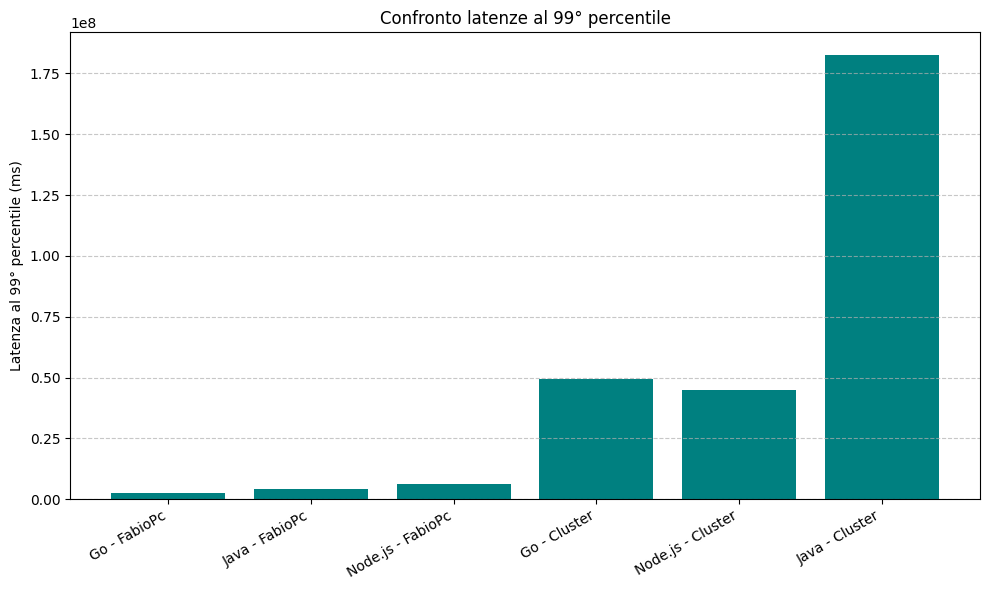

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dati (dal tuo ultimo messaggio)
df_go_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/goFolder/latency_go_minio_endLatencyInc_500_FabioPc.csv', sep=';', index_col=0)
df_java_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/javaFolder/latency_javaQuarkus_minio_endLatencyInc_500_FabioPc.csv', sep=';', index_col=0)
df_node_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/nodejsFolder/latency_js_minio_endLatencyInc_500_FabioPc.csv', sep=';', index_col=0)
df_go_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/go/latency_go_minio_endLatencyInc_500_Cluster.csv', sep=';', index_col=0)
df_node_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/node/latency_node_minio_endLatencyInc_500_Cluster.csv', sep=';', index_col=0)
df_java_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/quarkus/latency_quarkus_minio_endLatencyInc_500_Cluster.csv', sep=';', index_col=0)

# Rimuovi la prima riga da ogni DataFrame
df_go_fabiopc = df_go_fabiopc.iloc[1:]
df_java_fabiopc = df_java_fabiopc.iloc[1:]
df_node_fabiopc = df_node_fabiopc.iloc[1:]
df_go_cluster = df_go_cluster.iloc[1:]
df_node_cluster = df_node_cluster.iloc[1:]
df_java_cluster = df_java_cluster.iloc[1:]


def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()            # rimuove spazi iniziali/finali
                  .str.lower()            # tutto minuscolo
                  .str.replace(' ', '_')  # spazi → underscore
                  .str.replace(r'[^a-z0-9_]', '', regex=True)  # rimuove caratteri non alfanumerici o underscore
    )
    return df

# Applichiamo la pulizia a tutti i DataFrame
df_go_fabiopc = clean_column_names(df_go_fabiopc)
df_java_fabiopc = clean_column_names(df_java_fabiopc)
df_node_fabiopc = clean_column_names(df_node_fabiopc)
df_go_cluster = clean_column_names(df_go_cluster)
df_node_cluster = clean_column_names(df_node_cluster)
df_java_cluster = clean_column_names(df_java_cluster)


# Organizzo i DataFrame in un dizionario per comodità
dfs = {
    'Go - FabioPc': df_go_fabiopc,
    'Java - FabioPc': df_java_fabiopc,
    'Node.js - FabioPc': df_node_fabiopc,
    'Go - Cluster': df_go_cluster,
    'Node.js - Cluster': df_node_cluster,
    'Java - Cluster': df_java_cluster
}

# Prendo il nome della prima colonna di uno dei DataFrame (supponiamo sia la stessa per tutti)
latency_col = list(df_go_fabiopc.columns)[0]
# Assicuriamoci di rimuovere eventuali spazi dal nome colonna
latency_col = latency_col.strip()

# Calcolo il 99° percentile per ogni DataFrame
percentili_99 = {}
for nome, df in dfs.items():
    # Converto in numerico e tolgo eventuali NaN
    valori = pd.to_numeric(df[latency_col], errors='coerce').dropna()
    percentili_99[nome] = valori.quantile(0.99)

# Plot
plt.figure(figsize=(10,6))
plt.bar(percentili_99.keys(), percentili_99.values(), color='teal')
plt.ylabel('Latenza al 99° percentile (ms)')
plt.title('Confronto latenze al 99° percentile')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
